In [149]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans, HDBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

In [150]:
data = pd.read_csv('./Data/OutputDatos2.csv')
data.head()

,titleType,startYear,runtimeMinutes,numVotes,region,main_genre,secondary_genre
0,movie,1991,137,1128166,US,Action,Sci-Fi
1,tvSeries,2000,22,577,US,Action,Adventure
2,movie,2002,150,860569,US,Biography,Drama
3,movie,2004,120,417391,US,Action,Crime
4,movie,2005,132,5946,US,Biography,Drama


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   titleType        7462 non-null   object
 1   startYear        7462 non-null   int64 
 2   runtimeMinutes   7462 non-null   int64 
 3   numVotes         7462 non-null   int64 
 4   region           7462 non-null   object
 5   main_genre       7462 non-null   object
 6   secondary_genre  7462 non-null   object
dtypes: int64(3), object(4)
memory usage: 408.2+ KB


In [152]:
data.describe()

,startYear,runtimeMinutes,numVotes
count,7462.000000,7462.000000,7.462000e+03
mean,2013.162557,100.792147,7.288656e+04
std,6.977416,64.615235,1.641005e+05
min,1990.000000,3.000000,1.000000e+01
25%,2008.000000,60.000000,6.265250e+03
50%,2015.000000,101.000000,1.527900e+04
75%,2019.000000,122.000000,5.648475e+04
max,2023.000000,990.000000,2.197234e+06


In [153]:
data_objects = data.select_dtypes(include = ['object']).columns
data[data_objects].describe()

,titleType,region,main_genre,secondary_genre
count,7462,7462,7462,7462
unique,4,4,22,26
top,movie,IN,Drama,Drama
freq,4676,5590,1767,2426


In [154]:
for o  in data_objects:
    le = LabelEncoder()
    le.fit(data[o])
    data[o] = le.transform(data[o])

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7462 entries, 0 to 7461
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   titleType        7462 non-null   int32
 1   startYear        7462 non-null   int64
 2   runtimeMinutes   7462 non-null   int64
 3   numVotes         7462 non-null   int64
 4   region           7462 non-null   int32
 5   main_genre       7462 non-null   int32
 6   secondary_genre  7462 non-null   int32
dtypes: int32(4), int64(3)
memory usage: 291.6 KB


In [156]:
data.describe()

,titleType,startYear,runtimeMinutes,numVotes,region,main_genre,secondary_genre
count,7462.000000,7462.000000,7462.000000,7.462000e+03,7462.000000,7462.000000,7462.000000
mean,1.009113,2013.162557,100.792147,7.288656e+04,1.535781,3.989949,8.754623
std,1.374387,6.977416,64.615235,1.641005e+05,0.865731,2.962262,6.270109
min,0.000000,1990.000000,3.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,0.000000,2008.000000,60.000000,6.265250e+03,2.000000,1.000000,4.000000
50%,0.000000,2015.000000,101.000000,1.527900e+04,2.000000,4.000000,6.000000
75%,3.000000,2019.000000,122.000000,5.648475e+04,2.000000,7.000000,16.000000
max,3.000000,2023.000000,990.000000,2.197234e+06,3.000000,21.000000,25.000000


In [157]:
data_normalizada = (data - data.min()) / (data.max() - data.min())
data_normalizada

,titleType,startYear,runtimeMinutes,numVotes,region,main_genre,secondary_genre
0,0.0,0.030303,0.135765,0.513446,1.0,0.000000,0.76
1,1.0,0.303030,0.019250,0.000258,1.0,0.000000,0.00
2,0.0,0.363636,0.148936,0.391657,1.0,0.142857,0.24
3,0.0,0.424242,0.118541,0.189958,1.0,0.000000,0.16
4,0.0,0.454545,0.130699,0.002702,1.0,0.142857,0.24
...,...,...,...,...,...,...,...
7457,0.0,0.878788,0.106383,0.001715,0.0,0.333333,0.72
7458,1.0,0.878788,0.022290,0.001506,0.0,0.095238,0.12
7459,0.0,0.878788,0.097264,0.001518,0.0,0.333333,0.72
7460,0.0,0.878788,0.082067,0.001655,0.0,0.333333,0.64


In [158]:
hdb = HDBSCAN(min_cluster_size=30)

In [159]:
clustering = hdb.fit_predict(data_normalizada)

In [160]:
clustering

array([-1, -1, -1, ...,  2,  2, -1], dtype=int64)

In [161]:
HDBSCAN_data = data_normalizada.copy()
HDBSCAN_data.loc[:,'Cluster'] = clustering

In [162]:
HDBSCAN_data.Cluster.value_counts().to_frame()

,Cluster
4,3208
1,1948
2,1321
-1,362
0,311
5,276
3,36


In [163]:
HDBSCAN_data

,titleType,startYear,runtimeMinutes,numVotes,region,main_genre,secondary_genre,Cluster
0,0.0,0.030303,0.135765,0.513446,1.0,0.000000,0.76,-1
1,1.0,0.303030,0.019250,0.000258,1.0,0.000000,0.00,-1
2,0.0,0.363636,0.148936,0.391657,1.0,0.142857,0.24,-1
3,0.0,0.424242,0.118541,0.189958,1.0,0.000000,0.16,-1
4,0.0,0.454545,0.130699,0.002702,1.0,0.142857,0.24,-1
...,...,...,...,...,...,...,...,...
7457,0.0,0.878788,0.106383,0.001715,0.0,0.333333,0.72,2
7458,1.0,0.878788,0.022290,0.001506,0.0,0.095238,0.12,0
7459,0.0,0.878788,0.097264,0.001518,0.0,0.333333,0.72,2
7460,0.0,0.878788,0.082067,0.001655,0.0,0.333333,0.64,2


In [164]:
HDBSCAN_data.groupby('Cluster').count()

,titleType,startYear,runtimeMinutes,numVotes,region,main_genre,secondary_genre
Cluster,,,,,,,
-1,362,362,362,362,362,362,362
0,311,311,311,311,311,311,311
1,1948,1948,1948,1948,1948,1948,1948
2,1321,1321,1321,1321,1321,1321,1321
3,36,36,36,36,36,36,36
4,3208,3208,3208,3208,3208,3208,3208
5,276,276,276,276,276,276,276


In [168]:
outliers = HDBSCAN_data[HDBSCAN_data['Cluster']==-1]

In [166]:
HDBSCAN_data['Cluster']

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
7457    2
7458    0
7459    2
7460    2
7461   -1
Name: Cluster, Length: 7462, dtype: int64

In [179]:
HDBSCAN_data[HDBSCAN_data['Cluster']!=-1]

,titleType,startYear,runtimeMinutes,numVotes,region,main_genre,secondary_genre,Cluster
5,0.0,0.696970,0.115502,0.228576,1.0,0.142857,0.24,3
6,0.0,0.939394,0.109422,0.007940,1.0,0.142857,0.24,3
7,0.0,0.878788,0.109422,0.000217,1.0,0.190476,0.24,3
18,0.0,0.878788,0.107396,0.015711,1.0,0.190476,0.24,3
22,0.0,0.727273,0.091185,0.000015,1.0,0.142857,0.20,3
...,...,...,...,...,...,...,...,...
7456,0.0,0.939394,0.100304,0.001941,0.0,0.190476,0.24,2
7457,0.0,0.878788,0.106383,0.001715,0.0,0.333333,0.72,2
7458,1.0,0.878788,0.022290,0.001506,0.0,0.095238,0.12,0
7459,0.0,0.878788,0.097264,0.001518,0.0,0.333333,0.72,2


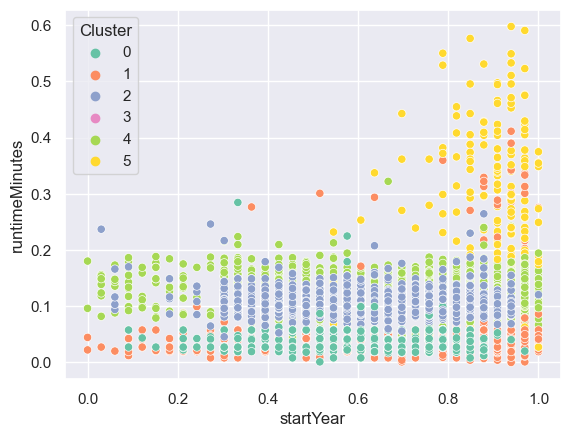

In [186]:
sns.scatterplot(x='startYear', y='runtimeMinutes',
                data=HDBSCAN_data[HDBSCAN_data['Cluster']!=-1],
                hue='Cluster', palette='Set2', legend='full')
plt.show()
